In [94]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
torch.manual_seed(2019)
import matplotlib.pyplot as plt 

In [95]:
X_array = pd.read_csv('C:/Users/yangg/Downloads/ArOpt15.csv', header=None).values
Y_array = pd.read_csv('C:/Users/yangg/Downloads/ArOpt15Label.csv', header=None).values.T
Y_array = Y_array/Y_array.max()
random.seed(2019)
X_train, X_test, y_train, y_test = train_test_split(X_array, Y_array, test_size=0.2, random_state=1)

x = torch.from_numpy(X_train).float()
y = torch.from_numpy(y_train).float()
xPredicted = torch.from_numpy(X_test).float()
yTestReal = torch.from_numpy(y_test).float()
x, y = Variable(x), Variable(y)

In [96]:
y.size()

torch.Size([43, 1])

In [97]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [98]:
net = Net(n_feature=15, n_hidden=15, n_output=1) 
print(net)
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

Net(
  (hidden): Linear(in_features=15, out_features=15, bias=True)
  (predict): Linear(in_features=15, out_features=1, bias=True)
)


0.7846502
0.90996826
0.49794078
0.24220954
0.15121372
0.11846377
0.10653383
0.10200269
0.09998033
0.09891975
0.09800767
0.09645271
0.09513078
0.094710276
0.09428324
0.09449166
0.09252904
0.09204675
0.09134458
0.09153187
0.08916724
0.088002555
0.086933374
0.08684628
0.08573813
0.0883468
0.08336974
0.081040375
0.08187644
0.07736821
0.07608231
0.07551229
0.0773804
0.070470765
0.06848786
0.06709972
0.06790649
0.076898694
0.06832652
0.059661753
0.057820573
0.058239724
0.052945033
0.05231016
0.04999732
0.050905064
0.04491146
0.04357641
0.042719074
0.044458672
0.03778373
0.03624867
0.035554603
0.038134273
0.03173131
0.030659607
0.029439984
0.028763825
0.027536256
0.03142547
0.02519536
0.025148181
0.023269152
0.023502547
0.021740792
0.02229144
0.020563254
0.023016576
0.018747393
0.019385437
0.01786981
0.01910921
0.016172158
0.016778676
0.015571939
0.016959097
0.015617782
0.0192398
0.015084225
0.017148767
0.013758736
0.015397584
0.0140701495
0.0182709
0.014049648
0.01851719
0.013857391
0.018352

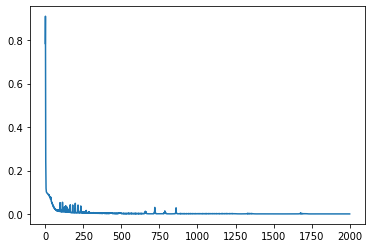

In [99]:
lost_hist = np.zeros([2000])
for t in range(2000):
    prediction = net(x.float())     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    print(loss.data.numpy())
    lost_hist[t] =  loss.data.numpy()
t = np.linspace(0,2000,2000)
plt.plot(t,lost_hist)
plt.show()


prediction = net(x.float())

tensor([[[1.2400]],

        [[4.9180]],

        [[6.5380]],

        [[6.7060]],

        [[6.5790]],

        [[5.4310]],

        [[6.6250]],

        [[6.5710]],

        [[6.4420]],

        [[6.0010]],

        [[3.7210]],

        [[5.5790]],

        [[6.8790]],

        [[5.9080]],

        [[4.4880]],

        [[6.7400]],

        [[6.3940]],

        [[5.1710]],

        [[0.7460]],

        [[6.9910]],

        [[3.9630]],

        [[5.8620]],

        [[6.2330]],

        [[6.6500]],

        [[6.6190]],

        [[4.1010]],

        [[6.5790]],

        [[4.3860]],

        [[5.7210]],

        [[1.2010]],

        [[1.9840]],

        [[6.7600]],

        [[0.3470]],

        [[4.5630]],

        [[0.2800]],

        [[4.6610]],

        [[2.0250]],

        [[3.4830]],

        [[2.5790]],

        [[2.5790]],

        [[3.5510]],

        [[6.6240]],

        [[6.3820]]], dtype=torch.float64)


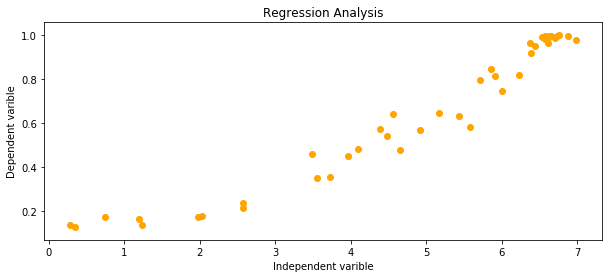

RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #2 'mat2' in call to _th_mm

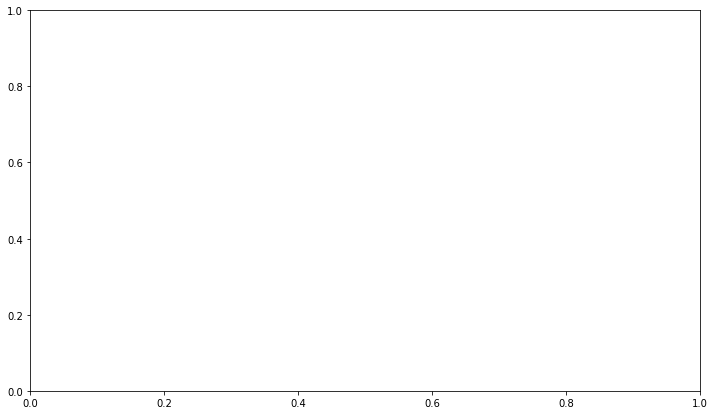

In [33]:
prediction

tensor([[0.1226],
        [0.5314],
        [0.9795],
        [0.9795],
        [0.9795],
        [0.6717],
        [0.9795],
        [0.9795],
        [0.9148],
        [0.7291],
        [0.3488],
        [0.5845],
        [0.9795],
        [0.7813],
        [0.5142],
        [0.9795],
        [0.9795],
        [0.6346],
        [0.1513],
        [0.9198],
        [0.4051],
        [0.8501],
        [0.7884],
        [0.9795],
        [0.9795],
        [0.4274],
        [0.9795],
        [0.5842],
        [0.7309],
        [0.1522],
        [0.1717],
        [0.9795],
        [0.1411],
        [0.5926],
        [0.0973],
        [0.5108],
        [0.1750],
        [0.4074],
        [0.2087],
        [0.2087],
        [0.2958],
        [0.9546],
        [0.9795]], grad_fn=<AddmmBackward>)

In [37]:
y_predict= net(xPredicted.float()) 

In [36]:
y_predict-yTestReal

tensor([[-0.0166],
        [ 0.0112],
        [-0.0113],
        [ 0.0037],
        [-0.0173],
        [-0.0205],
        [-0.0911],
        [-0.0045],
        [-0.0012],
        [-0.1288],
        [ 0.1164]], grad_fn=<SubBackward0>)

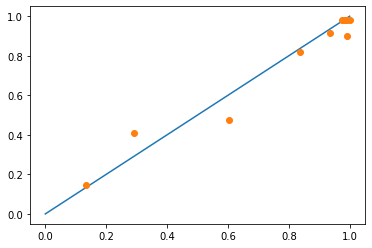

In [57]:
xx = np.linspace(0,1,100)
yy = np.linspace(0,1,100)
plt.plot(xx,yy)
plt.plot(yTestReal.detach().numpy(),y_predict.detach().numpy(), 'o')